In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.datasets import cifar100
from keras.layers import ELU
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")


169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
batch_size = 128 #batch size as 128
num_classes = 100 # we got 100 classes dataset
epochs = 12 # iterations over dataset
img_rows, img_cols = 32, 32

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

print('x_train Shape:', x_train.shape)
print('y_train Shape:', y_train.shape)
print('x_test  Shape:', x_test.shape)
print('y_test  Shape:', y_test.shape)

x_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000, 1)
x_test  Shape: (10000, 32, 32, 3)
y_test  Shape: (10000, 1)


In [ ]:
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
initializer = keras.initializers.HeNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",bias_initializer=keras.initializers.Constant(0.1), activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same",bias_initializer=keras.initializers.Constant(0.1), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),activation="relu"))
model.add(Dense(units=4096,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),activation="relu"))
model.add(Dense(num_classes,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       5

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping
import datetime
import os

checkpoint = ModelCheckpoint('VGG_SGD_BATCHNORM.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[early,checkpoint])
# history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
#                     steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/12
391/391 [==============================] - ETA: 0s - loss: 3.8327 - accuracy: 0.1442
Epoch 00001: val_accuracy improved from -inf to 0.14220, saving model to VGG_Adam_Plain.hdf5
391/391 [==============================] - 27s 68ms/step - loss: 3.8327 - accuracy: 0.1442 - val_loss: 3.7438 - val_accuracy: 0.1422
Epoch 2/12
390/391 [============================>.] - ETA: 0s - loss: 2.9544 - accuracy: 0.2637
Epoch 00002: val_accuracy improved from 0.14220 to 0.24870, saving model to VGG_Adam_Plain.hdf5
391/391 [==============================] - 26s 66ms/step - loss: 2.9541 - accuracy: 0.2637 - val_loss: 3.0527 - val_accuracy: 0.2487
Epoch 3/12
390/391 [============================>.] - ETA: 0s - loss: 2.5263 - accuracy: 0.3483
Epoch 00003: val_accuracy improved from 0.24870 to 0.31200, saving model to VGG_Adam_Plain.hdf5
391/391 [==============================] - 26s 67ms/step - loss: 2.5256 - accuracy: 0.3485 - val_loss: 2.7640 - val_accuracy: 0.3120
Epoch 4/12
390/391 [========

In [ ]:

# Test the model
y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))

Prec: 0.4507767478540414
Recall: 0.3957
Accuracy: 0.3957


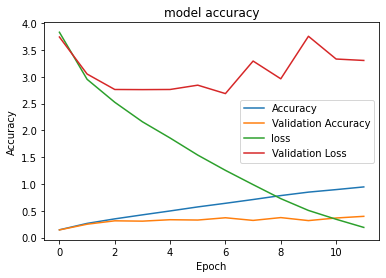

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# cell to load best weights

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.datasets import cifar100
from keras.layers import ELU
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 #normalising the data.
x_test /= 255 #normalising the data.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

initializer = keras.initializers.HeNormal()
#layer = tf.keras.layers.Dense(3, kernel_initializer=initializer)

model = Sequential()
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same",bias_initializer=keras.initializers.Constant(0.1), activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer, padding="same",bias_initializer=keras.initializers.Constant(0.1), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3),kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),activation="relu"))
model.add(Dense(units=4096,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1),activation="relu"))
model.add(Dense(num_classes,kernel_initializer=initializer,bias_initializer=keras.initializers.Constant(0.1), activation='softmax'))

model.load_weights('../weights/VGG16_SGD_With_BatchNormalization.hdf5')

y_true = y_test.argmax(-1)
y_pred = model.predict(x_test).argmax(-1)
# generate confusion matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(y_true, y_pred)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
